In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [3]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt
plt.rcParams.update({'figure.figsize':(9,7), 'figure.dpi':120})

In [4]:
df = pd.read_csv('trainn.csv')
df

,id,date,store_nbr,item_nbr,unit_sales,onpromotion
0,0,01/01/2013,25,103665,7.0,NaN
1,1,01/01/2013,25,105574,1.0,NaN
2,2,01/01/2013,25,105575,2.0,NaN
3,3,01/01/2013,25,108079,1.0,NaN
4,4,01/01/2013,25,108701,1.0,NaN
...,...,...,...,...,...,...
1048570,1048570,27/01/2013,48,956013,31.0,NaN
1048571,1048571,27/01/2013,48,956014,57.0,NaN
1048572,1048572,27/01/2013,48,957096,6.0,NaN
1048573,1048573,27/01/2013,48,957098,4.0,NaN


In [5]:
dt = df[['store_nbr', 'unit_sales']]
a = dt.groupby(["store_nbr"]).sum()

In [6]:
b =a.sort_values(['unit_sales'], ascending = False)
b.head()

,unit_sales
store_nbr,
44,615660.239
45,487900.733
47,482367.503
3,445768.398
46,440871.510


=> Top 4 stores have the highest sum unit sales is 44, 45, 47 and 3.

In [38]:
store03 = df[df['store_nbr'] == 3]
store03 = store03[['date', 'unit_sales']]
store03

,date,unit_sales
2699,02/01/2013,6.0
2700,02/01/2013,36.0
2701,02/01/2013,21.0
2702,02/01/2013,6.0
2703,02/01/2013,2.0
...,...,...
1013762,27/01/2013,3.0
1013763,27/01/2013,2.0
1013764,27/01/2013,8.0
1013765,27/01/2013,5.0


In [39]:
store03 = store03.groupby(["date"]).sum()
store03

,unit_sales
date,
02/01/2013,24060.348
03/01/2013,18570.745
04/01/2013,17392.098
05/01/2013,22700.872
06/01/2013,25343.620
07/01/2013,17036.253
08/01/2013,14220.417
09/01/2013,14735.148
10/01/2013,12222.912


In [29]:
# Checking the missing values
store03.isnull().sum()

unit_sales    0
dtype: int64

From above we can see there is no missing values in the dataset

In [55]:
store03.describe()

,unit_sales
count,26.000000
mean,17144.938385
std,4006.965150
min,11454.688000
25%,14203.046750
50%,15972.966000
75%,20198.353000
max,25343.620000


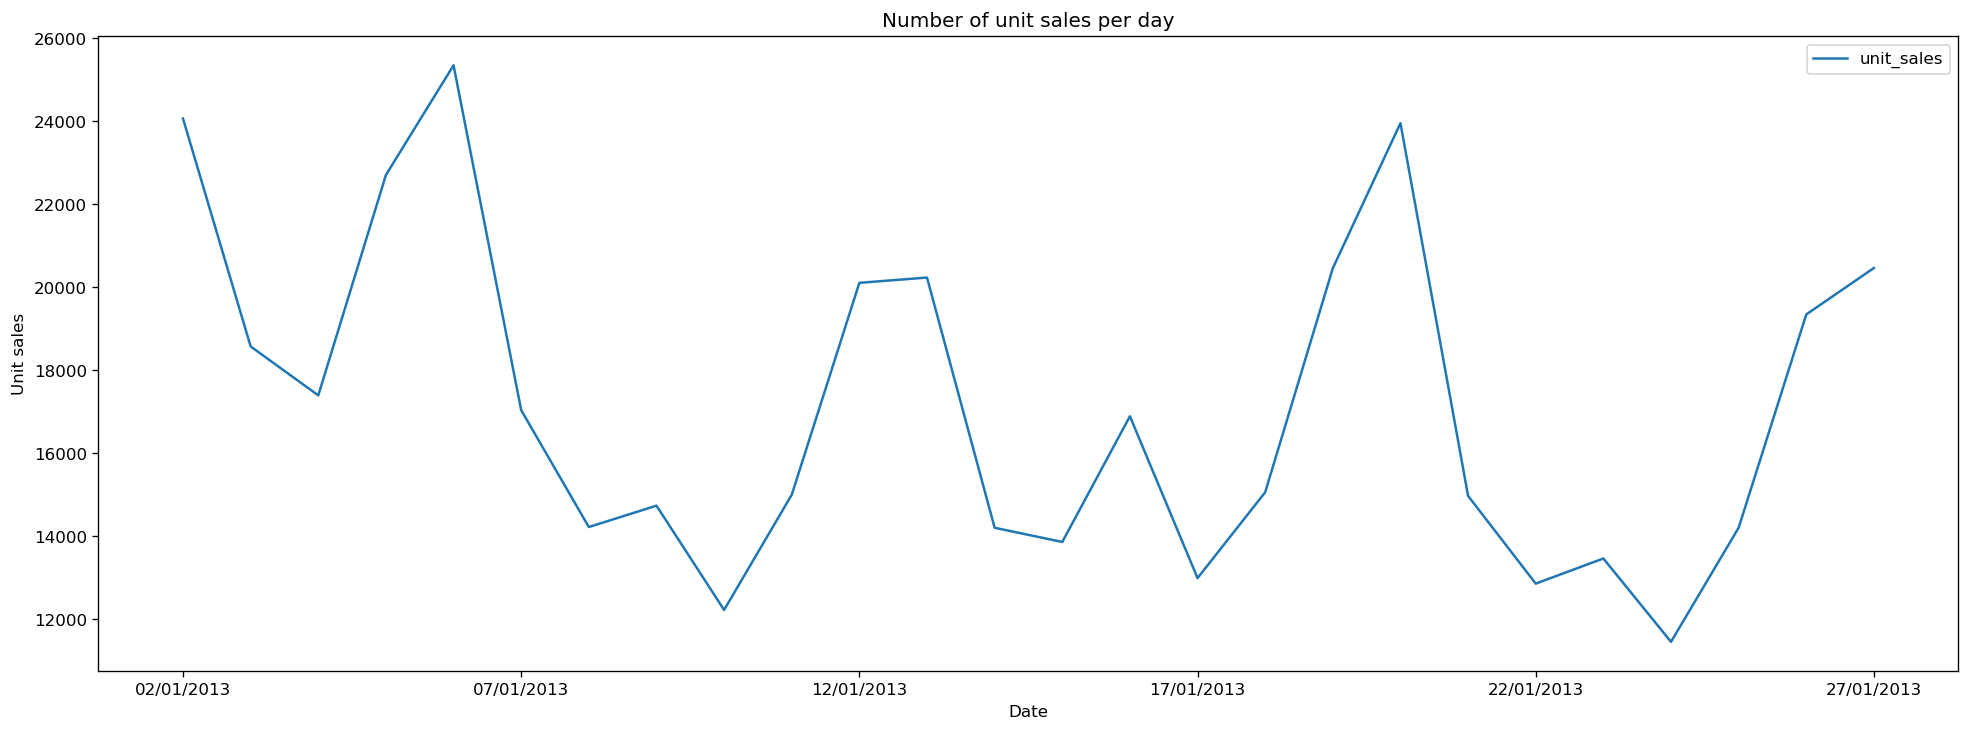

In [69]:
store03.plot(figsize= (20,7))
plt.title("Number of unit sales per day")
plt.ylabel('Unit sales')
plt.xlabel('Date')
plt.show()

Text(0.5, 0, 'Date')

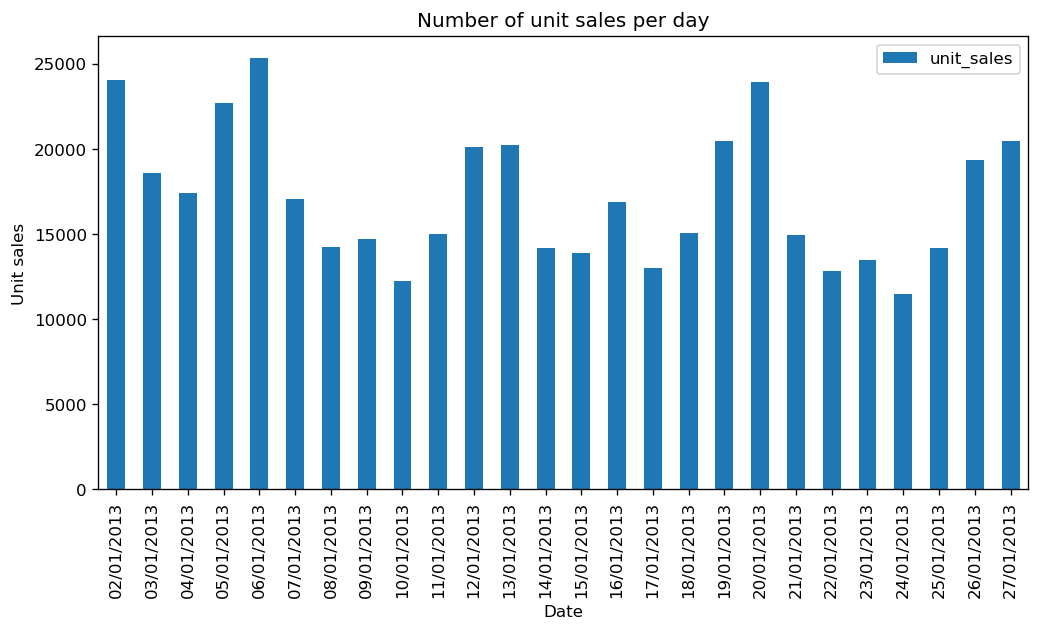

In [67]:
store03.plot(kind='bar', figsize=(10,5))
plt.title("Number of unit sales per day")
plt.ylabel('Unit sales')
plt.xlabel('Date')

In [42]:
# Create Training and Test
train = store03[:21]
test = store03[20:]

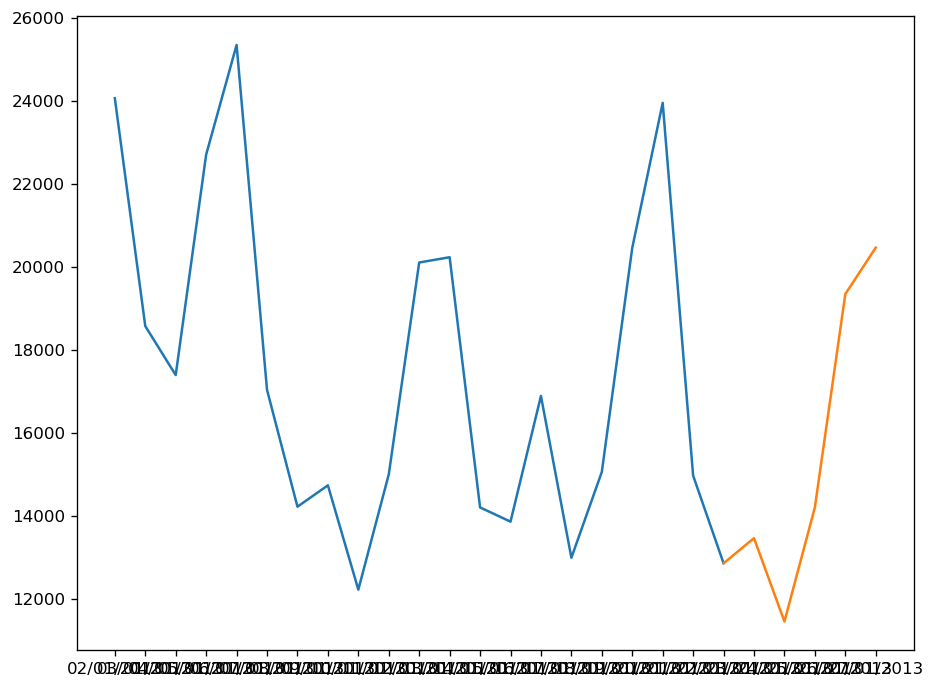

In [43]:
plt.plot(train)
plt.plot(test)

In [44]:
# Dickey–Fuller test:
result = adfuller(train['unit_sales'])
print('ADF Statistic: {}'.format(result[0]))
print('p-value: {}'.format(result[1]))
print('Critical Values:')
for key, value in result[4].items():
    print('\t{}: {}'.format(key, value))
if result[1] <= 0.05:
    print("=>> Strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data is stationary (Chuỗi dừng)")
else:
    print("=>> Weak evidence against null hypothesis,indicating it is non-stationary (Chuỗi không dừng) ")


ADF Statistic: -3.8217676201621935
p-value: 0.0026922928769859303
Critical Values:
	1%: -3.9240193847656246
	5%: -3.0684982031250003
	10%: -2.67389265625
=>> Strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data is stationary (Chuỗi dừng)


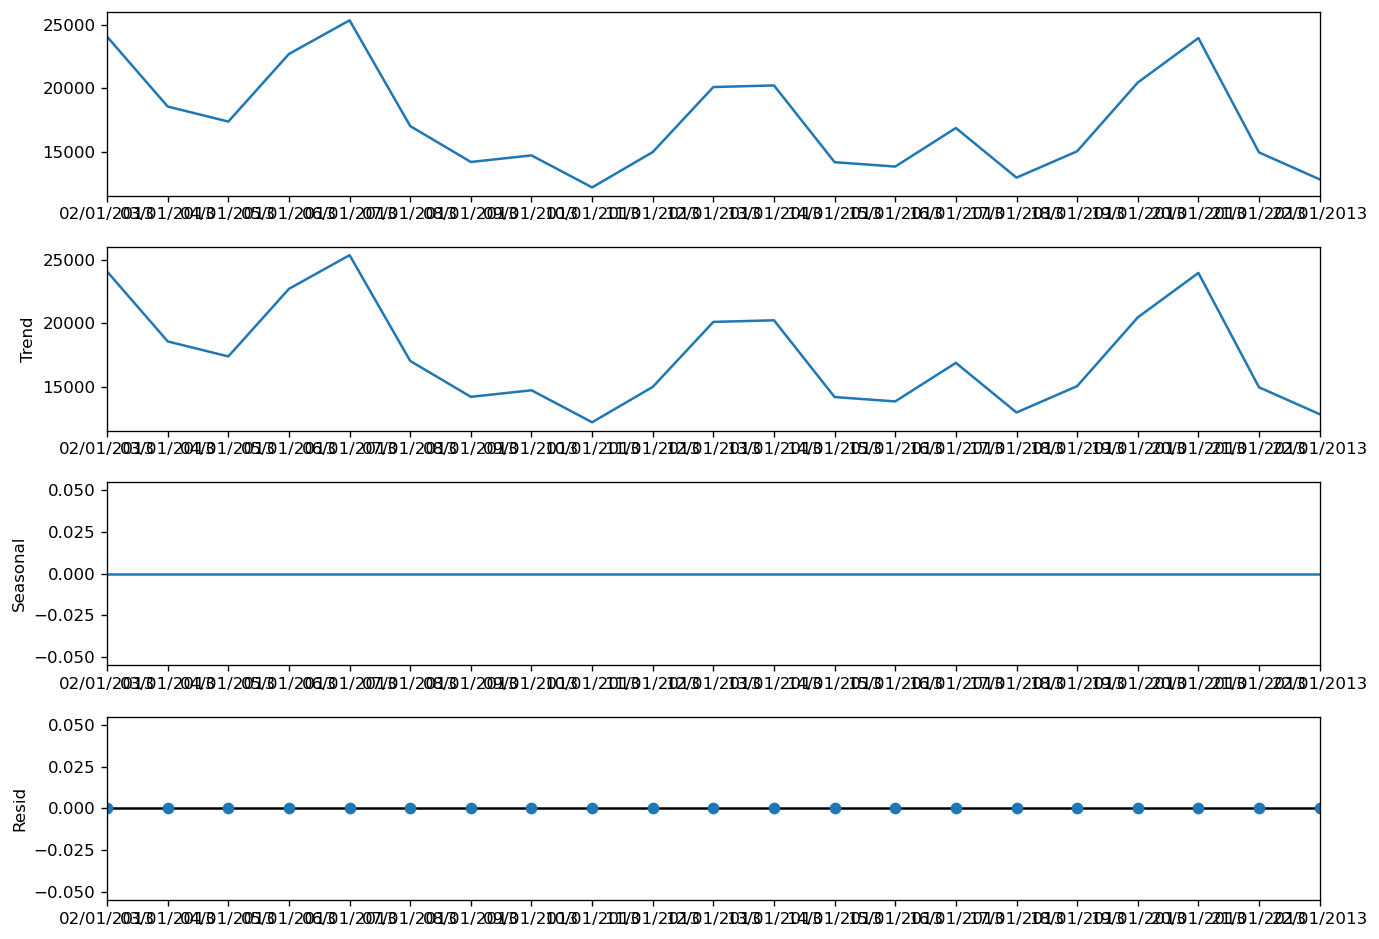

In [46]:
result = seasonal_decompose(train, model='additive', period=1)
fig = result.plot()
fig.set_size_inches(12,8)
x=result.observed

<Figure size 1440x720 with 0 Axes>

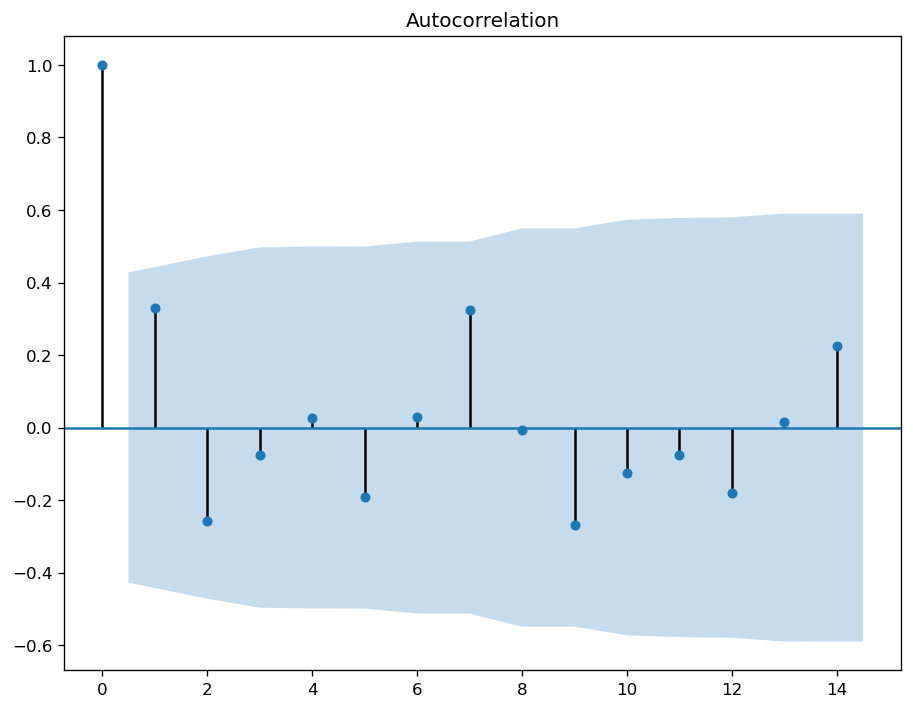

In [47]:
#ACF
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plt.figure(figsize=(12, 6))
ax1 = plot_acf(x)

<Figure size 1440x1200 with 0 Axes>

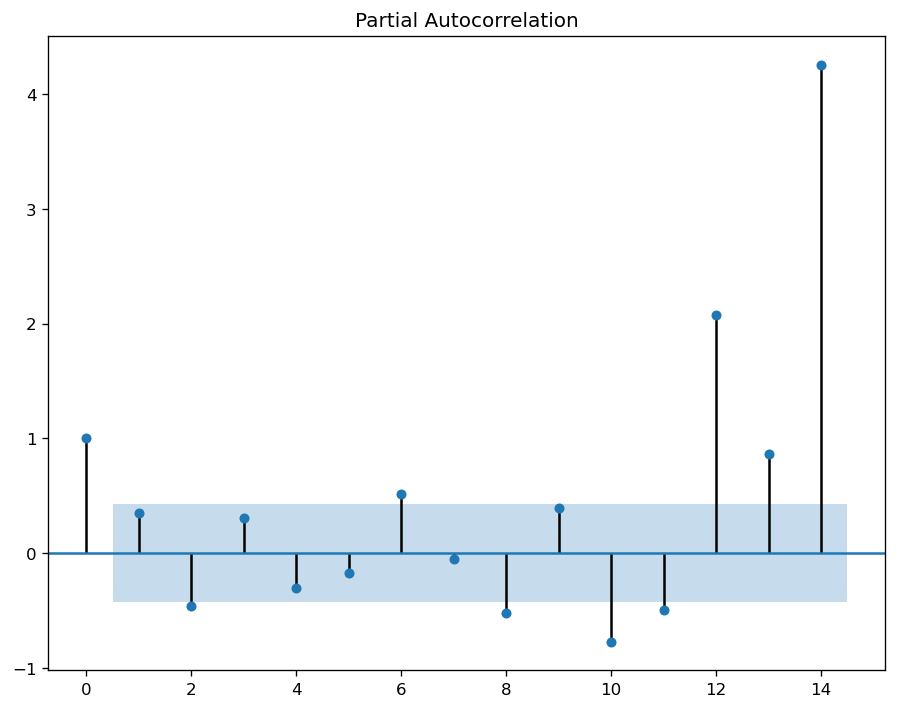

In [48]:
#PACF
plt.figure(figsize=(12,10))
ax2=plot_pacf(x)

In [49]:
# Import the library 
from pmdarima import auto_arima 
  
# Ignore harmless warnings 
import warnings 
warnings.filterwarnings("ignore") 
  
# Fit auto_arima function to  dataset 
model_fit = auto_arima(train['unit_sales'], start_p = 1, start_q = 1, 
                          max_p = 3, max_q = 3, m = 12, 
                          start_P = 0, seasonal = False, 
                          d = 0, D = 0, trace = True, 
                          error_action ='ignore',   # we don't want to know if an order does not work 
                          suppress_warnings = True,  # we don't want convergence warnings 
                          stepwise = False)           # set to stepwise 
  
# To print the summary 
model_fit.summary()

 ARIMA(0,0,0)(0,0,0)[0]             : AIC=472.909, Time=0.19 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=inf, Time=0.06 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=inf, Time=0.09 sec
 ARIMA(0,0,3)(0,0,0)[0]             : AIC=inf, Time=0.15 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=417.998, Time=0.04 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=419.024, Time=0.03 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=413.524, Time=0.07 sec
 ARIMA(1,0,3)(0,0,0)[0]             : AIC=415.478, Time=0.19 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=419.927, Time=0.05 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=419.817, Time=0.10 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=415.516, Time=0.09 sec
 ARIMA(2,0,3)(0,0,0)[0]             : AIC=415.128, Time=0.21 sec
 ARIMA(3,0,0)(0,0,0)[0]             : AIC=inf, Time=0.08 sec
 ARIMA(3,0,1)(0,0,0)[0]             : AIC=414.649, Time=0.14 sec
 ARIMA(3,0,2)(0,0,0)[0]             : AIC=415.620, Time=0.10 sec

Best model:  ARIMA(1,0,2)(0,0,0)[0]     

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   21
Model:               SARIMAX(1, 0, 2)   Log Likelihood                -202.762
Date:                Thu, 01 Apr 2021   AIC                            413.524
Time:                        21:46:52   BIC                            417.702
Sample:                             0   HQIC                           414.430
                                 - 21                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9995      0.003    326.774      0.000       0.994       1.005
ma.L1         -0.1365      0.317     -0.431      0.667      -0.758       0.485
ma.L2         -0.6978      0.373     -1.869      0.062      -1.430       0.034
sigma2      1.173e+07   9.07e-09   1.29e+15      0.000    1.17e+07    1.17e+07
===================================================================================
Ljung-Box (Q):                       34.54   Jarque-Bera (JB):                 1.03
Prob(Q):                              0.02   Prob(JB):                         0.60
Heteroskedasticity (H):               1.05   Skew:                            -0.12
Prob(H) (two-sided):                  0.95   Kurtosis:                         1.94
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 6.6e+30. Standard errors may be unstable.
"""

<Figure size 1440x720 with 0 Axes>

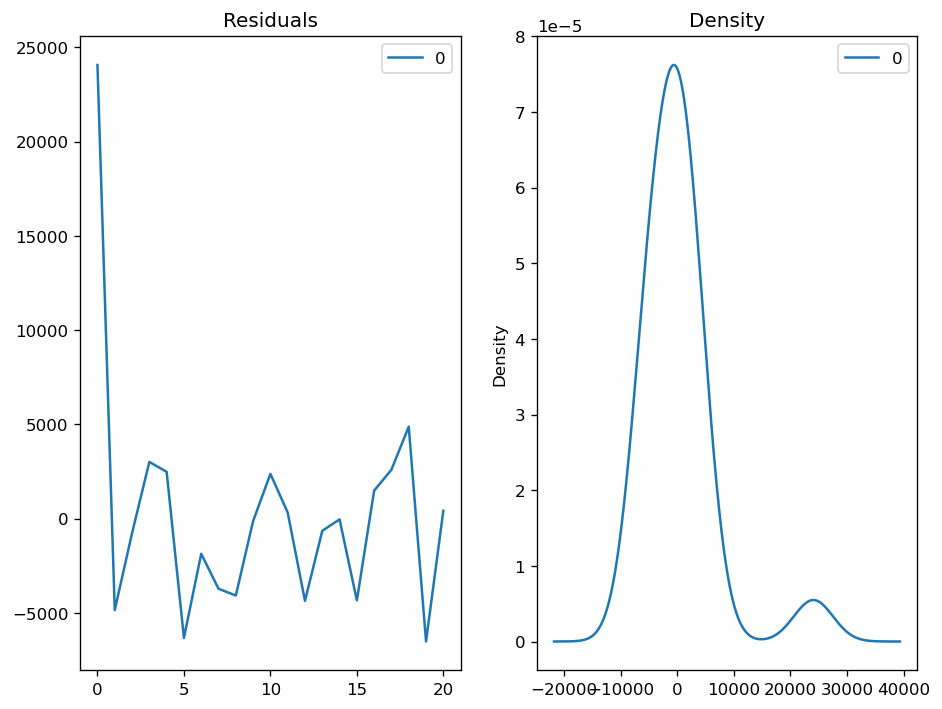

In [50]:
# Kiem tra phuong sai
residuals = pd.DataFrame(model_fit.resid())
plt.figure(figsize=(12, 6))
fig, ax = plt.subplots(1,2)
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
plt.show()